# Telecom Churn Case Study


## Business Problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 - For many incumbent operators, retaining high profitable customers is the number one business goal.
 - To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Objective

 - To predict the Churn in the last month using the data from first 3 months
 - Understanding the behaviour of the customer during the churn
 - Defining 3 different phases for the customer life cycle
      - Good Phase : The customer is happy with the service and behaves as usual
      - Action Phase : The customer experience starts to sore in this phase
      - Churn Phase : In this phase, the customer is said to have churned
 - Classify diferrent types of Churn
      - Revenue Based Churn : Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time
      - Usage Based Churn : Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

### Step 1: Importing and Data checks

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [4]:
# Importing all datasets
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
#Lets create the copy of Original data so that we can re-use it if required
original_data = churn_data.copy()
original_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
# let's look at the statistical aspects of the dataframe
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [7]:
churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [8]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churn_data.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn_data.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


In [9]:
# Checking for null values
churn_data.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [10]:
# Checking the null value percentage
churn_data.isna().sum()/churn_data.isna().count()*100

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

In [11]:
churn_data.shape

(99999, 226)

In [12]:
# Checking for the duplicates
churn_data.drop_duplicates(subset=None, inplace=True)

In [13]:
churn_data.shape #From the results, it is clear that there are no duplicates

(99999, 226)

## Step 2: Data cleansing and Imputing missing values

#### 1. Imputing Missing Values

In [14]:
# look at missing value ratio in each column
churn_data.isnull().sum()*100/churn_data.shape[0]

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

In [15]:
missing_percentages = churn_data.isnull().sum() * 100 / churn_data.shape[0]
print(missing_percentages)

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64


In [16]:
#Checking the columns which have null values greater than 30%
missing_percentages = missing_percentages[missing_percentages > 30]
print(missing_percentages)

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

 #### From above, We can see columns which has more than 74% values are missing. We can Ignore the date of last recharge and remove other recharge related columns

In [17]:
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]
churn_data[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [18]:
# We can see that the recharge date and the recharge value are missing together which means the customer didn't recharge. lets check for these entries where recharge is null
churn_data.loc[churn_data.total_rech_data_6.isnull() & churn_data.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [19]:
#We can impute the null values with 0 indicating the the recharge was not done.
recharge_null = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [20]:
# impute missing values with 0
churn_data[recharge_null] = churn_data[recharge_null].apply(lambda x: x.fillna(0))

In [21]:
#Lets check if the values has been imputed
print(churn_data[recharge_null].isnull().sum()*100/churn_data.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [22]:
#Lets check for summary
print(churn_data[recharge_null].describe(include='all'))

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count       99999.000000        99999.000000        99999.000000   
mean            0.632806           48.445409           51.393440   
std             1.669040          127.743863          132.629365   
min             0.000000            0.000000            0.000000   
25%             0.000000            0.000000            0.000000 

In [23]:
# now that we have imputed successfully, we can go ahead and drop id and date columns
churn_data = churn_data.drop(id_cols + date_cols, axis=1)
print(churn_data.shape)

(99999, 212)


#### 2. Replacing Missing Values (Nan) in Categorical Variables
We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [24]:
# replace missing values with '-1' in categorical columns
churn_data[cat_cols] = churn_data[cat_cols].apply(lambda x: x.fillna(-1))

In [25]:
# missing value ratio
print("Missing value ratio:\n")
print(churn_data[cat_cols].isnull().sum()*100/churn_data.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


#### 3. Drop variables with more than 70% of missing values

In [26]:
initial_cols = churn_data.shape[1]
initial_cols

212

In [27]:
include_cols = list(churn_data.apply(lambda column: True if column.isnull().sum()/churn_data.shape[0] < 0.7 else False))
include_cols
drop_missing = pd.DataFrame({'features':churn_data.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
...,...,...
207,aon,True
208,aug_vbc_3g,True
209,jul_vbc_3g,True
210,jun_vbc_3g,True


In [28]:
# drop columns
churn_data = churn_data.loc[:, include_cols]

dropped_cols = churn_data.shape[1] - initial_cols
print(dropped_cols)

-16


In [29]:
churn_data.shape

(99999, 196)

In [30]:
# rechecking the missing values for how many missing values has left
churn_data.isnull().sum()*100/churn_data.shape[0]

loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
arpu_6            0.00000
arpu_7            0.00000
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 196, dtype: float64

In [31]:
# Now we are left with numerical variables and we need to impute values for the same
num_cols = [column for column in churn_data.columns if column not in id_cols + date_cols + cat_cols]
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [32]:
#imputing with meadian for num_cols
churn_data[num_cols] = churn_data[num_cols].apply(lambda x: x.fillna(x.median()))

In [33]:
#checking for the missing values
churn_data.isnull().sum()*100/churn_data.shape[0]

loc_og_t2o_mou    0.0
std_og_t2o_mou    0.0
loc_ic_t2o_mou    0.0
arpu_6            0.0
arpu_7            0.0
                 ... 
aon               0.0
aug_vbc_3g        0.0
jul_vbc_3g        0.0
jun_vbc_3g        0.0
sep_vbc_3g        0.0
Length: 196, dtype: float64

In churn prediction, wthere are three phases of customer lifecycle :

 - The ‘good’ phase [Month 6 & 7]
 - The ‘action’ phase [Month 8]
 - The ‘churn’ phase [Month 9]

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

## Step 3: Filter high-value customers

Considering the recharge month of 6 and 7 data to get high value customers

In [34]:
#Total data Recharge amount for June and July. (number of recharges * average recharge amount)
churn_data['total_data_rech_6']= churn_data.total_rech_data_6 * churn_data.av_rech_amt_data_6
churn_data['total_data_rech_7']= churn_data.total_rech_data_7 * churn_data.av_rech_amt_data_7

In [35]:
#Total Recharge amount = Call Recharge Amount + Data Recharge Amount
churn_data['Total_amt_data_6'] = churn_data.total_rech_amt_6 + churn_data.total_data_rech_6
churn_data['Total_amt_data_7'] = churn_data.total_rech_amt_7 + churn_data.total_data_rech_7

In [36]:
#Average Rehcarge amount done by a customer in June and July
churn_data['avg_amt_data_6_7'] = (churn_data.Total_amt_data_6 + churn_data.Total_amt_data_7)/2

In [37]:
#to filter for High value, lets consider 70th Percentile
hvc = churn_data.avg_amt_data_6_7.quantile(0.7)
hvc

478.0

In [38]:
churn_data_hvc = churn_data.loc[churn_data.avg_amt_data_6_7 >= hvc, :]
churn_data_hvc = churn_data_hvc.reset_index(drop=True)

In [39]:
churn_data_hvc.shape

(30001, 201)

In [40]:
#Since we have arrived at High Value Customer list, we can drop the fields we created to arrive at this.
churn_data_hvc = churn_data_hvc.drop(['total_data_rech_6','total_data_rech_7','Total_amt_data_6','Total_amt_data_7', 'avg_amt_data_6_7'], axis=1)

In [41]:
churn_data_hvc.shape

(30001, 196)

## Step 4: Tagging churners and removing attributes of the churn phase

To derive the Churn, we need to use ith Month data. To get the Target variable, we need to use the 

In [42]:
# Calculate the total incoeing and outgoing minutes of usage
churn_data_hvc['total_calls_mou_9'] = churn_data_hvc['total_ic_mou_9'] + churn_data_hvc['total_og_mou_9']

In [43]:
#calculate 2g and 3g data consumption
churn_data_hvc['total_internet_mb_9'] = churn_data_hvc['vol_2g_mb_9'] + churn_data_hvc['vol_3g_mb_9']

In [44]:
#Lets create a Churn variable : Customer who have not used either calls or data in the month of Sep are the ones that have churned. 
churn_data_hvc['churn'] = churn_data_hvc.apply(lambda row : 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis = 1)

In [45]:
#delete the derived variables
churn_data_hvc = churn_data_hvc.drop(['total_calls_mou_9', 'total_internet_mb_9'],axis=1)

In [46]:
churn_data_hvc.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,...,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,1
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,...,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,1
2,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,...,-1.0,1.0,1.0,-1.0,315,21.03,910.65,122.16,0.00,0
3,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,85.14,...,-1.0,-1.0,-1.0,-1.0,720,0.00,0.00,0.00,0.00,0
4,0.0,0.0,0.0,74.350,193.897,366.966,811.480,48.96,50.66,33.58,...,-1.0,1.0,1.0,1.0,604,40.45,51.86,0.00,0.00,0


In [47]:
#print churn ratio
print(churn_data_hvc.churn.value_counts()*100/churn_data_hvc.shape[0])

churn
0    91.863605
1     8.136395
Name: count, dtype: float64


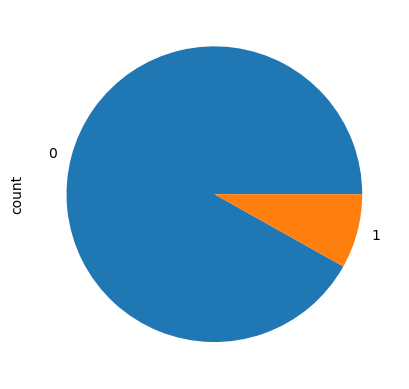

In [48]:
#print churn ratio
(churn_data_hvc.churn.value_counts()*100/churn_data_hvc.shape[0]).plot(kind = 'pie')
plt.show()

#### We see that there are 92% of the customers that are not churn, there is a possibility of class imbalance

In [49]:
# lets check the columns with no variance in their values and drop such columns
for i in churn_data_hvc.columns:
    if churn_data_hvc[i].nunique() == 1:
        print("\nColumn",i,"has no variance and contains only", churn_data_hvc[i].nunique(),"unique value")
        print("Dropping the column",i)
        churn_data_hvc.drop(i,axis=1,inplace = True)


Column loc_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_ic_t2o_mou

Column std_og_t2c_mou_6 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_6

Column std_og_t2c_mou_7 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_7

Column std_og_t2c_mou_8 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_8

Column std_og_t2c_mou_9 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_9

Column std_ic_t2o_mou_6 has no variance and contains only 1 unique value
Dropping the column std_ic_t2o_mou_6

Column std_ic_t2o_mou_7 has no variance and contains only 1 unique value
Dropping the column std_ic_t2o_mou_7

Column std_i

In [50]:
churn_data_hvc.shape

(30001, 186)

In [51]:
# lets check the correlation amongst the features, drop the highly correlated ones
cor = churn_data_hvc.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()


roam_og_mou_8       roam_og_mou_7       0.601079
monthly_3g_6        vol_3g_mb_6         0.601308
av_rech_amt_data_8  max_rech_data_9     0.601925
av_rech_amt_data_9  max_rech_data_8     0.601939
total_ic_mou_7      loc_ic_t2t_mou_7    0.602134
                                          ...   
fb_user_8           night_pck_user_8    0.954831
total_rech_amt_8    arpu_8              0.955351
fb_user_7           night_pck_user_7    0.956322
fb_user_6           night_pck_user_6    0.956620
fb_user_9           night_pck_user_9    0.958548
Length: 389, dtype: float64

In [52]:
# we will drop the columns with high correlation (+/- 60%)
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9']

In [53]:
churn_data_hvc.drop(drop_col_list, axis=1, inplace=True)
churn_data_hvc.shape

(30001, 137)

In [54]:
#Lets check for all the columns to drop
cols_to_drop = [col for col in churn_data_hvc.columns if '_9' in col]
print(cols_to_drop)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [55]:
#Lets drop all the columns
churn_data_hvc.drop(cols_to_drop, axis=1, inplace=True)
churn_data_hvc.shape

(30001, 102)

In [56]:
(churn_data_hvc.isnull().sum() * 100 / len(churn_data_hvc)).sort_values(ascending = False)

arpu_6                0.0
last_day_rch_amt_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_6    0.0
                     ... 
spl_og_mou_7          0.0
spl_og_mou_6          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
churn                 0.0
Length: 102, dtype: float64

Step 5: EDA - Data Preparation - 
Univariate Analysis - 
Bivariate Analysi - s
Feature Engineering - Lets Derive new variables to understand the data (Feature Engineering)

In [57]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")

##### Univariate Analysis

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


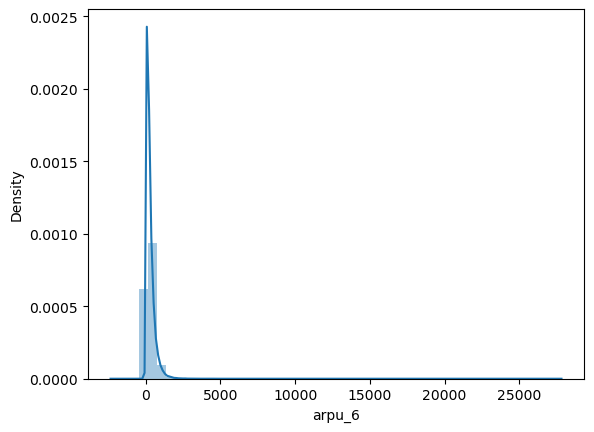

In [58]:
univariate(churn_data.arpu_6)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


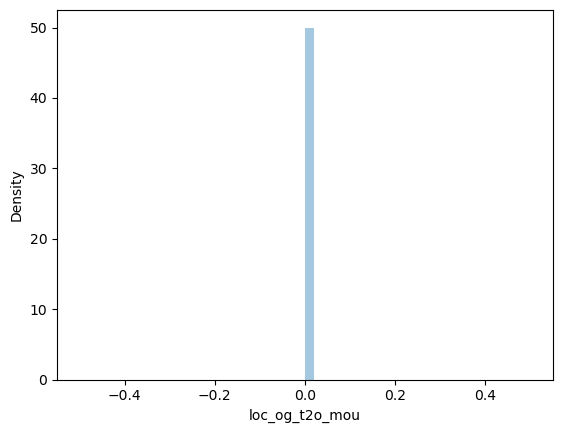

In [59]:
univariate(churn_data.loc_og_t2o_mou)

count    99999.000000
mean       127.604651
std        301.385516
min          0.000000
25%          7.410000
50%         32.360000
75%        106.740000
max      10752.560000
Name: onnet_mou_8, dtype: float64


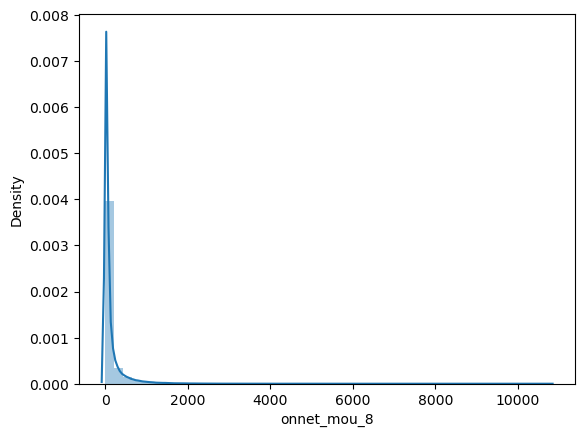

In [60]:
univariate(churn_data.onnet_mou_8)

count    99999.000000
mean       182.356135
std        308.012127
min          0.000000
25%         31.230000
50%         87.290000
75%        202.830000
max      10310.760000
Name: offnet_mou_9, dtype: float64


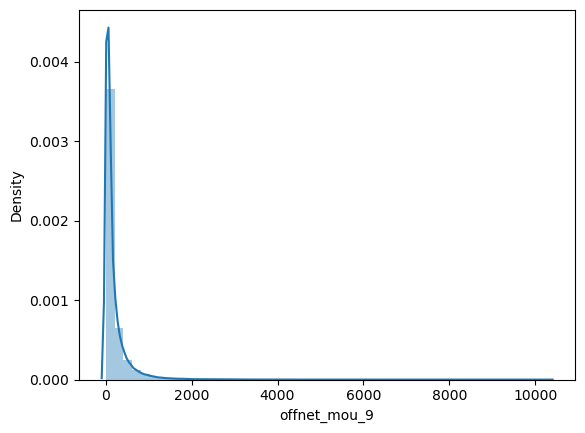

In [61]:
univariate(churn_data.offnet_mou_9)

##### Bivariate Analysis

In [62]:
def data_type(column, df):
    """Determine if the column in the DataFrame is categorical or numerical."""
    if pd.api.types.is_numeric_dtype(df[column]):
        return 'numerical'
    elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':
        return 'categorical'
    else:
        return 'unknown'

def bivariate(var1, var2, df):
    """Plot based on the types of var1 and var2 columns."""
    type_var1 = data_type(var1, df)
    type_var2 = data_type(var2, df)
    
    if type_var1 == 'numerical' and type_var2 == 'numerical':
        sns.regplot(x=var1, y=var2, data=df)
    elif (type_var1 == 'categorical' and type_var2 == 'numerical') or (type_var1 == 'numerical' and type_var2 == 'categorical'):
        sns.boxplot(x=var1, y=var2, data=df)
    else:
        print("Unsupported data types for plotting")
    
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Bivariate Plot: {var1} vs {var2}')
    plt.show()

In [65]:
# change data type to category
churn_data_hvc1 = churn_data_hvc.copy()
churn_data_hvc1.churn = churn_data_hvc1.churn.astype("category")

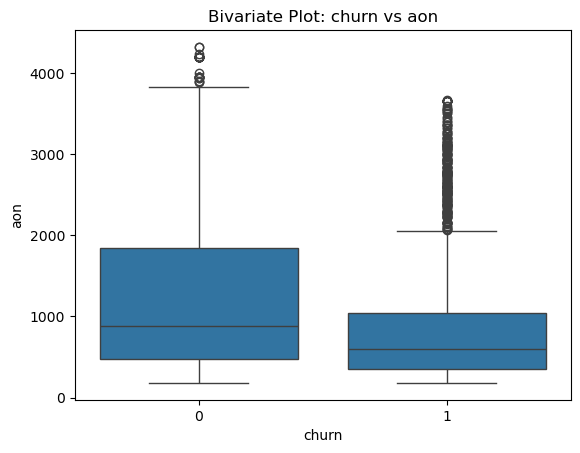

In [66]:
bivariate('churn', 'aon', churn_data_hvc1)

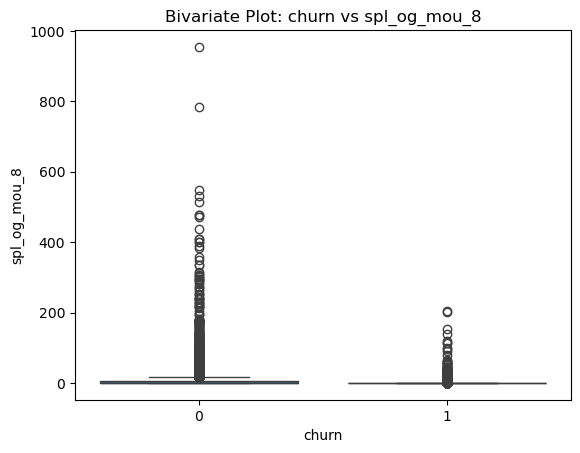

In [69]:
bivariate('churn', 'spl_og_mou_8', churn_data_hvc1)

In [70]:
pd.crosstab(churn_data_hvc1.churn, churn_data_hvc1.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


#### Feature Engineering - Lets Derive new variables to understand the data (Feature Engineering)

In [71]:
#We have column called 'aon' which is Age of Network. We can derive new variable from this to explain the data w.r.t churn

# creating a new variable 'tenure'
churn_data_hvc['tenure'] = (churn_data_hvc['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
churn_data_hvc.drop('aon',axis=1, inplace=True)

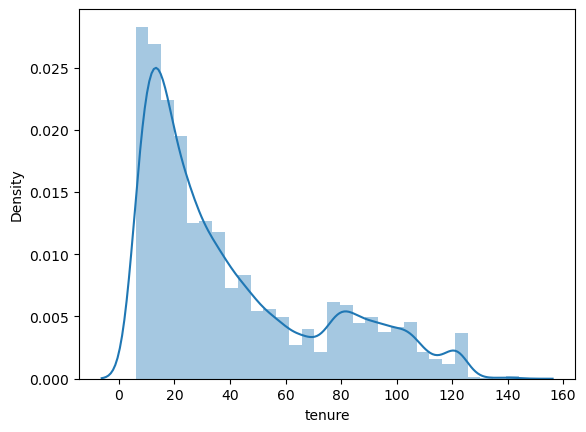

In [72]:
# Checking the distribution of he tenure variable

sns.distplot(churn_data_hvc['tenure'],bins=30)
plt.show()

In [73]:
# Lets do the Binning of Tenure using Tenure Range
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_data_hvc['tenure_range'] = pd.cut(churn_data_hvc['tenure'], tn_range, labels=tn_label)
churn_data_hvc['tenure_range'].head()

0        2-5 Yrs
1        2-5 Yrs
2    6-12 Months
3        1-2 Yrs
4        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

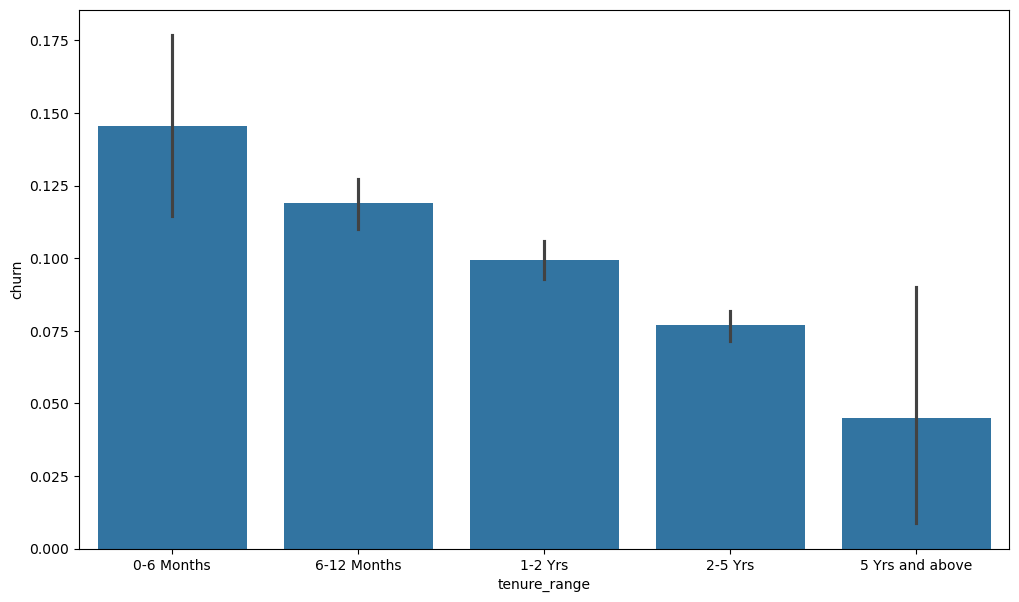

In [74]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=churn_data_hvc)
plt.show()

It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns

In [75]:
churn_data_hvc["avg_arpu_6_7"]= (churn_data_hvc['arpu_6']+churn_data_hvc['arpu_7'])/2
churn_data_hvc['avg_arpu_6_7'].head()

0     206.1005
1    1209.5150
2     435.4720
3     556.1030
4     134.1235
Name: avg_arpu_6_7, dtype: float64

In [76]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data
churn_data_hvc.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

# The curent dimension of the dataset after dropping few unwanted columns
churn_data_hvc.shape

(30001, 102)

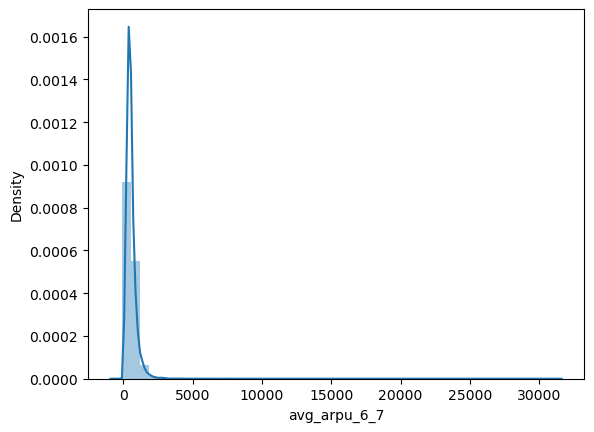

In [77]:
# Visualizing the column created
sns.distplot(churn_data_hvc['avg_arpu_6_7'])
plt.show()

In [78]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
# Convert categorical columns to numeric using one-hot encoding
churn_data_hvc_encoded = pd.get_dummies(churn_data_hvc, drop_first = True)

Text(0.5, 1.0, 'Features Correlating with Churn variable')

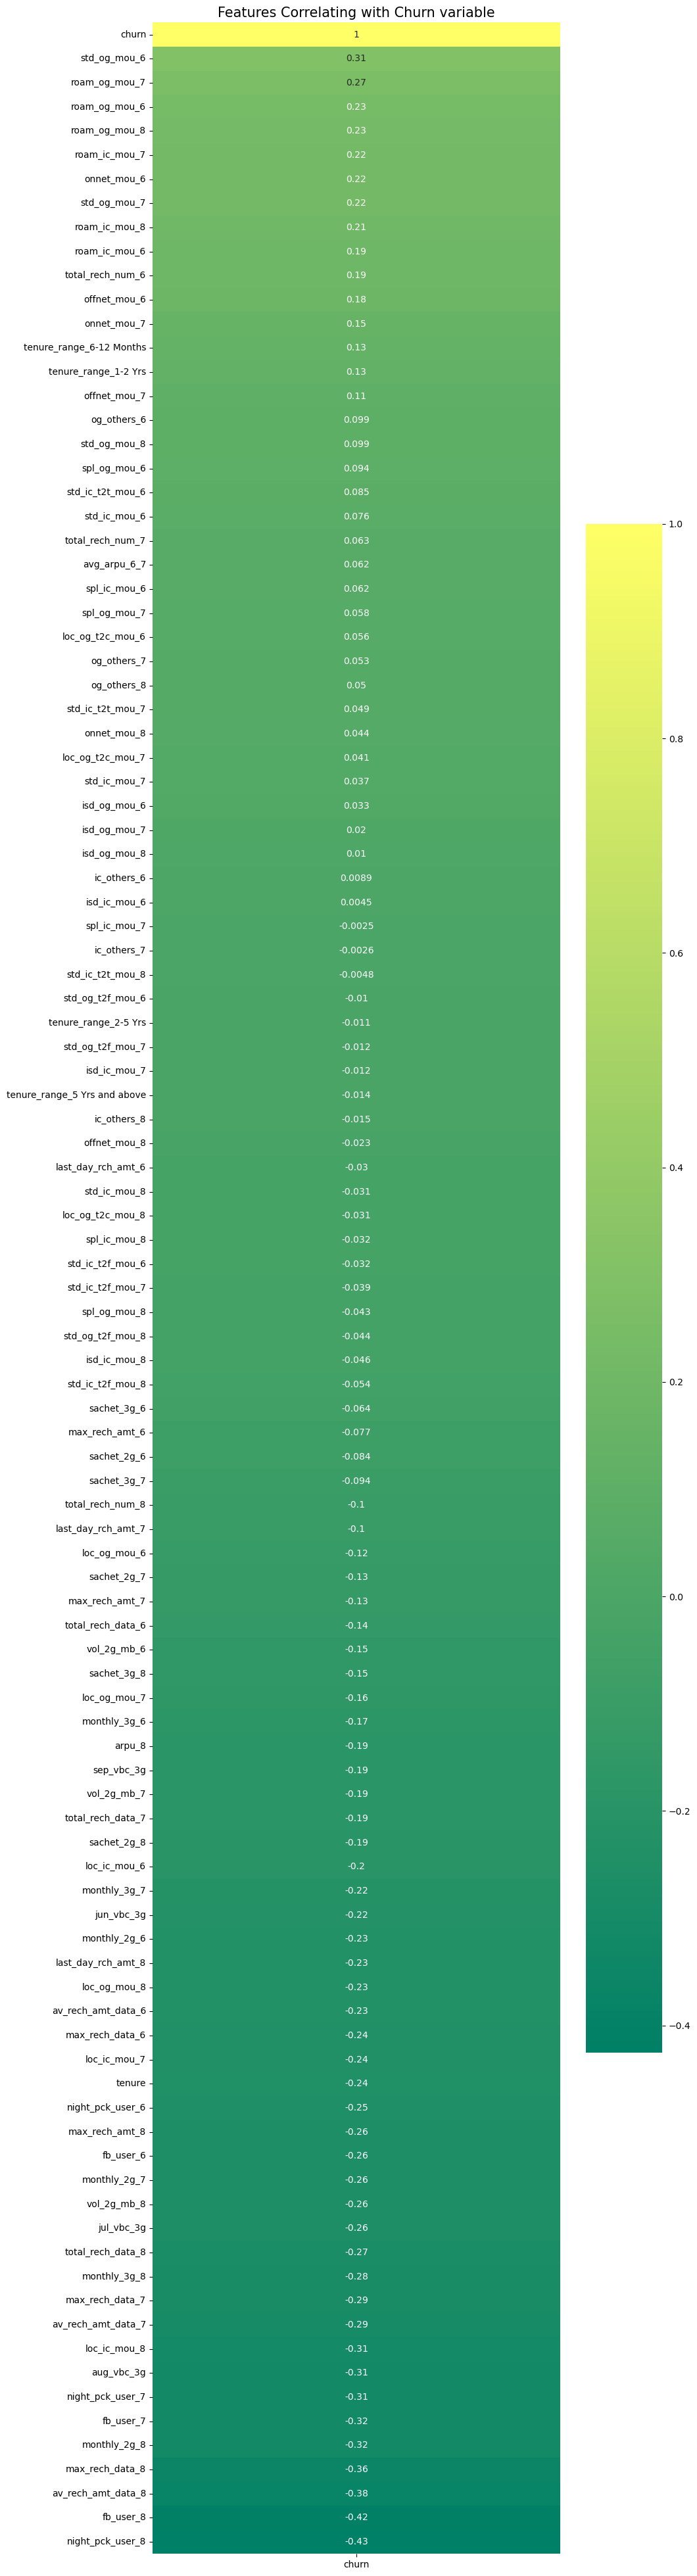

In [79]:
corr_matrix = churn_data_hvc_encoded.corr()

plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(corr_matrix.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn. . Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

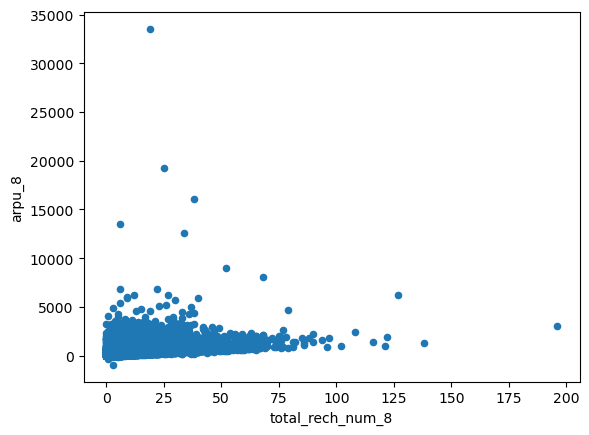

In [80]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
churn_data_hvc[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

In [81]:
# Creating categories for month 8 column totalrecharge and their count
churn_data_hvc['total_rech_data_group_8']=pd.cut(churn_data_hvc['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
churn_data_hvc['total_rech_num_group_8']=pd.cut(churn_data_hvc['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 total_rech_data_group_8
<=10_Recharges     15307
No_Recharge        14048
10-25_Recharges      608
>25_Recharges         38
Name: count, dtype: int64


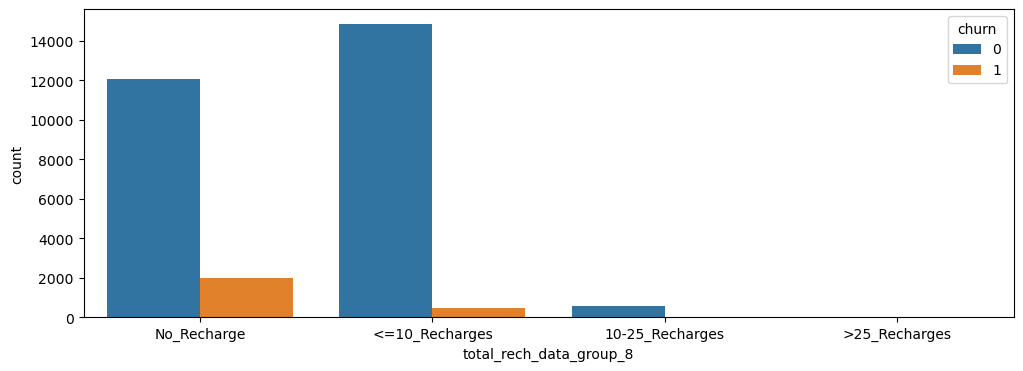

					Distribution of total_rech_num_8 variable
 total_rech_num_group_8
<=10_Recharges     19349
10-25_Recharges     8245
>25_Recharges       1824
No_Recharge          583
Name: count, dtype: int64


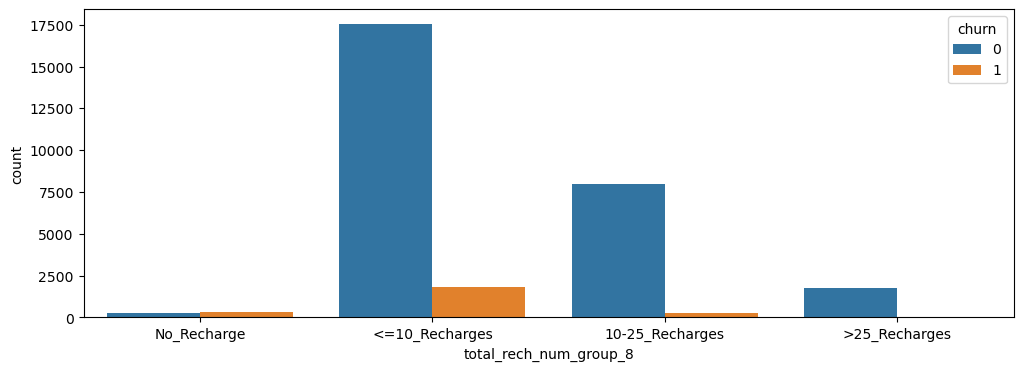

In [82]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=churn_data_hvc,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",churn_data_hvc['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=churn_data_hvc,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",churn_data_hvc['total_rech_num_group_8'].value_counts())
plt.show()

In [83]:
churn_data_hvc.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

In [84]:
#now we can drop all "mou related" columns except onnet and offnet variables

churn_data_hvc.drop(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8','std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
          'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [85]:
churn_data_hvc.shape

(30001, 55)

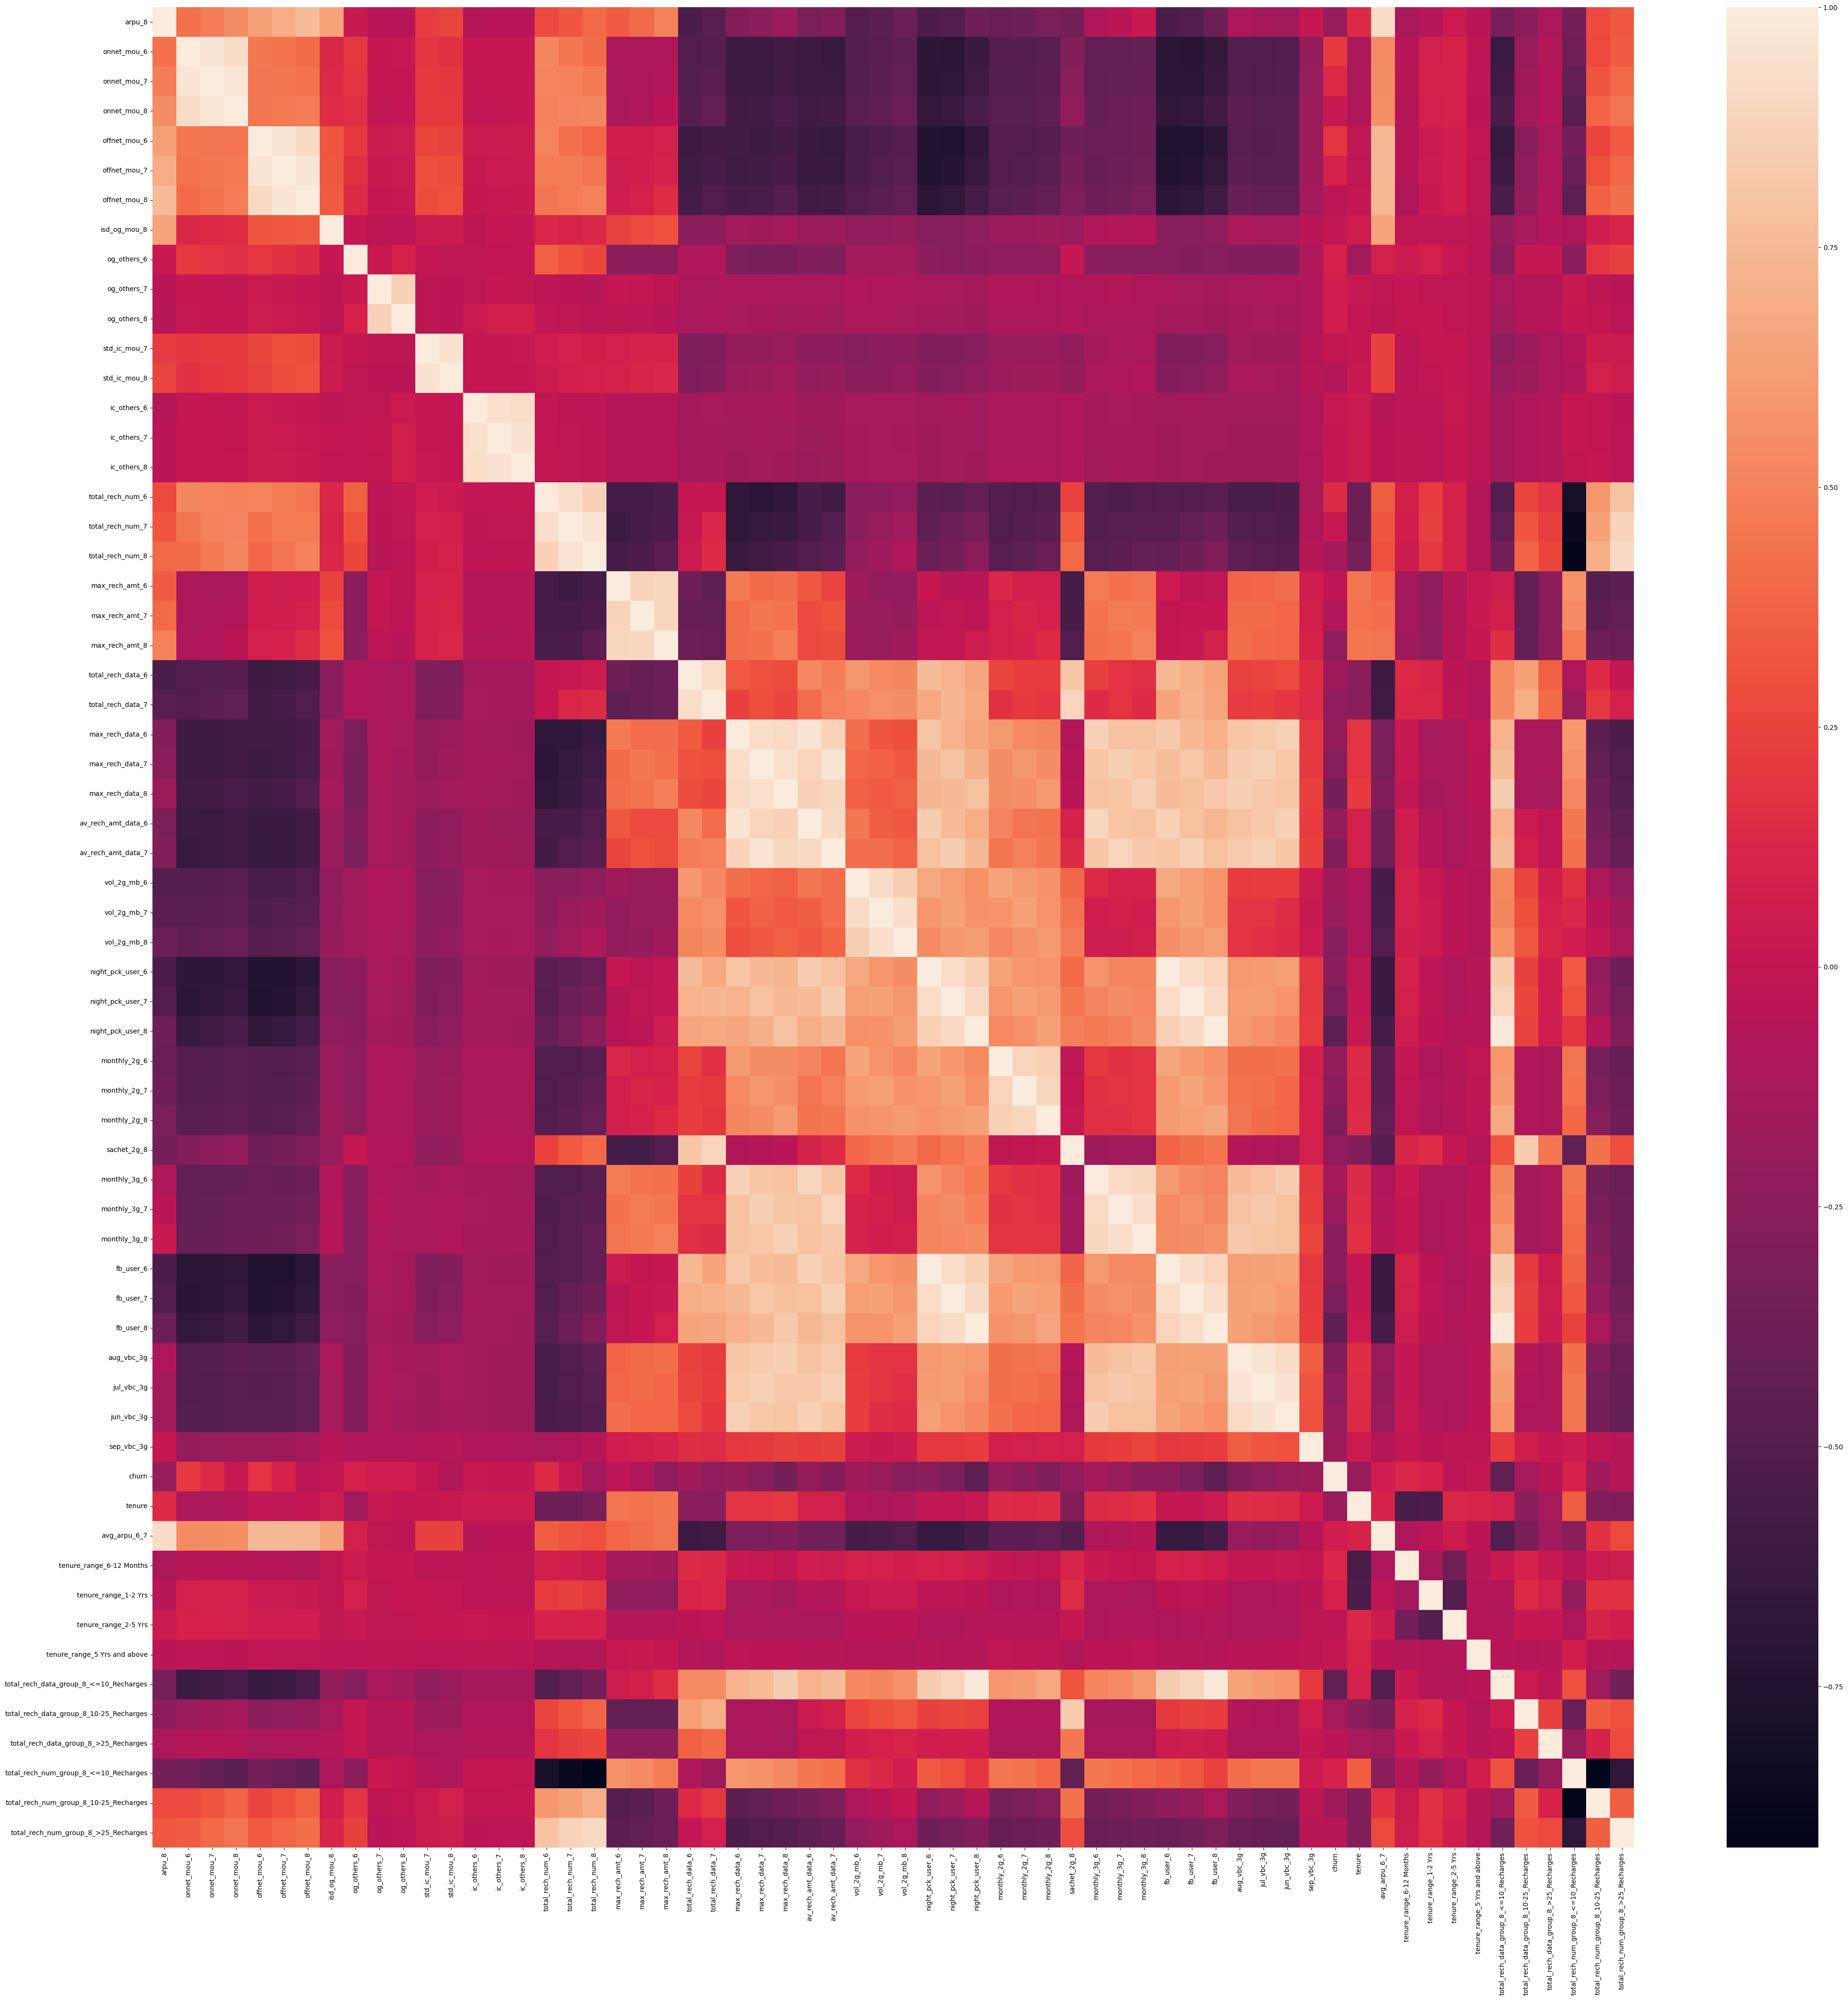

In [86]:
# Convert categorical columns to numeric using one-hot encoding
churn_data_hvc_encoded = pd.get_dummies(churn_data_hvc, drop_first=True)

# Calculate the correlation matrix
corr_matrix = churn_data_hvc_encoded.corr()

plt.figure(figsize = (50, 50))
sns.heatmap(corr_matrix.corr())
plt.show()

- Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn.
- Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

In [87]:
churn_data_hvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   arpu_8                   30001 non-null  float64 
 1   onnet_mou_6              30001 non-null  float64 
 2   onnet_mou_7              30001 non-null  float64 
 3   onnet_mou_8              30001 non-null  float64 
 4   offnet_mou_6             30001 non-null  float64 
 5   offnet_mou_7             30001 non-null  float64 
 6   offnet_mou_8             30001 non-null  float64 
 7   isd_og_mou_8             30001 non-null  float64 
 8   og_others_6              30001 non-null  float64 
 9   og_others_7              30001 non-null  float64 
 10  og_others_8              30001 non-null  float64 
 11  std_ic_mou_7             30001 non-null  float64 
 12  std_ic_mou_8             30001 non-null  float64 
 13  ic_others_6              30001 non-null  float64 
 14  ic_oth

In [88]:
churn_data_hvc.drop(['total_rech_data_group_8','total_rech_num_group_8',] , axis=1, inplace=True)

In [89]:
churn_data_hvc.shape

(30001, 53)

In [90]:
churn_data_hvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   arpu_8              30001 non-null  float64 
 1   onnet_mou_6         30001 non-null  float64 
 2   onnet_mou_7         30001 non-null  float64 
 3   onnet_mou_8         30001 non-null  float64 
 4   offnet_mou_6        30001 non-null  float64 
 5   offnet_mou_7        30001 non-null  float64 
 6   offnet_mou_8        30001 non-null  float64 
 7   isd_og_mou_8        30001 non-null  float64 
 8   og_others_6         30001 non-null  float64 
 9   og_others_7         30001 non-null  float64 
 10  og_others_8         30001 non-null  float64 
 11  std_ic_mou_7        30001 non-null  float64 
 12  std_ic_mou_8        30001 non-null  float64 
 13  ic_others_6         30001 non-null  float64 
 14  ic_others_7         30001 non-null  float64 
 15  ic_others_8         30001 non-null  

In [91]:
churn_data_hvc.drop(['tenure_range'] , axis=1, inplace=True)

In [92]:
churn_data_hvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_8              30001 non-null  float64
 1   onnet_mou_6         30001 non-null  float64
 2   onnet_mou_7         30001 non-null  float64
 3   onnet_mou_8         30001 non-null  float64
 4   offnet_mou_6        30001 non-null  float64
 5   offnet_mou_7        30001 non-null  float64
 6   offnet_mou_8        30001 non-null  float64
 7   isd_og_mou_8        30001 non-null  float64
 8   og_others_6         30001 non-null  float64
 9   og_others_7         30001 non-null  float64
 10  og_others_8         30001 non-null  float64
 11  std_ic_mou_7        30001 non-null  float64
 12  std_ic_mou_8        30001 non-null  float64
 13  ic_others_6         30001 non-null  float64
 14  ic_others_7         30001 non-null  float64
 15  ic_others_8         30001 non-null  float64
 16  tota

In [93]:
churn_rate = (sum(churn_data_hvc["churn"])/len(churn_data_hvc["churn"].index))*100
churn_rate

8.136395453484884

## Step 5 : Split data into Train and Test sets

In [94]:
X = churn_data_hvc.drop("churn", axis = 1)
y = churn_data_hvc.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [95]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22500, 51), (22500,), (7501, 51), (7501,))

## Step 6 : Data Transformation using Scaling

In [96]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,isd_og_mou_8,og_others_6,og_others_7,...,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tenure,avg_arpu_6_7
4525,183.004,3.93,0.00,0.00,4.09,0.16,15.46,0.0,0.00,0.0,...,0,1.0,-1.0,1.0,0.00,0.00,0.0,0.0,20.0,111.4590
12436,62.260,5.44,11.20,0.00,39.46,11.64,37.74,0.0,0.00,0.0,...,2,1.0,1.0,1.0,955.97,1613.36,735.4,0.0,11.0,93.4050
29024,24.750,725.11,671.44,11.76,145.63,80.66,2.50,0.0,2.33,0.0,...,0,-1.0,-1.0,-1.0,0.00,0.00,0.0,0.0,10.0,523.5985
11193,422.360,17.93,37.53,23.89,526.68,831.58,671.01,0.0,0.00,0.0,...,0,1.0,-1.0,-1.0,0.00,0.00,0.0,0.0,28.0,487.7310
10907,2300.151,7.53,11.88,56.49,788.53,1441.28,5453.33,0.0,0.98,0.0,...,0,-1.0,-1.0,1.0,0.00,0.00,0.0,0.0,81.0,497.1310


In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22500 entries, 4525 to 22754
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_8              22500 non-null  float64
 1   onnet_mou_6         22500 non-null  float64
 2   onnet_mou_7         22500 non-null  float64
 3   onnet_mou_8         22500 non-null  float64
 4   offnet_mou_6        22500 non-null  float64
 5   offnet_mou_7        22500 non-null  float64
 6   offnet_mou_8        22500 non-null  float64
 7   isd_og_mou_8        22500 non-null  float64
 8   og_others_6         22500 non-null  float64
 9   og_others_7         22500 non-null  float64
 10  og_others_8         22500 non-null  float64
 11  std_ic_mou_7        22500 non-null  float64
 12  std_ic_mou_8        22500 non-null  float64
 13  ic_others_6         22500 non-null  float64
 14  ic_others_7         22500 non-null  float64
 15  ic_others_8         22500 non-null  float64
 16  total_

In [98]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [99]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [100]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,isd_og_mou_8,og_others_6,og_others_7,...,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tenure,avg_arpu_6_7
4525,0.032729,0.000561,0.000000,0.000000,0.000587,0.000017,0.001104,0.0,0.000000,0.0,...,0.000,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.101449,0.026756
12436,0.029228,0.000776,0.001511,0.000000,0.005668,0.001204,0.002694,0.0,0.000000,0.0,...,0.125,1.0,1.0,1.0,0.074013,0.176023,0.065859,0.0,0.036232,0.026196
29024,0.028141,0.103423,0.090600,0.001639,0.020916,0.008344,0.000178,0.0,0.033045,0.0,...,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.028986,0.039560
11193,0.039669,0.002557,0.005064,0.003330,0.075646,0.086021,0.047904,0.0,0.000000,0.0,...,0.000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.159420,0.038446
10907,0.094115,0.001074,0.001603,0.007874,0.113255,0.149091,0.389319,0.0,0.013899,0.0,...,0.000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.543478,0.038738


## Step 7 - Data Modeling and Model Evaluation and Prepare Model for Predictor variables selection

#### 1. Data Imbalance Handling - Using SMOTE method

In [101]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [102]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (41338, 51)
Dimension of y_train_sm Shape: (41338,)


#### 2. Logistic Regression

In [103]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [104]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41286
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 04 Aug 2024   Deviance:                       37502.
Time:                        22:15:34   Pearson chi2:                 3.81e+07
No. Iterations:                    14   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2143      0.087     14.016      0.000       1.044       1.384
arpu_8               -22.5319      3.241     -6.951      0.000     -28.885     -16.179
onnet_mou_6            1.0958      0.349      3.139      0.002       0.412       1.780
onnet_mou_7            2.1265      0.486      4.378      0.000       1.175       3.078
onnet_mou_8           -5.4689      0.537    -10.193      0.000      -6.520      -4.417
offnet_mou_6           0.9677      0.354      2.735      0.006       0.274       1.661
offnet_mou_7           5.1516      0.638      8.073      0.000       3.901       6.402
offnet_mou_8         -25.7539      1.248    -20.629      0.000     -28.201     -23.307
isd_og_mou_8           3.6056      4.095      0.880      0.379      -4.421      11.632
og_others_6           -2.9659      0.514     -5.768      0.000      -3.974      -1.958
og_others_7           -1.5132      6.262     -0.242      0.809     -13.787      10.760
og_others_8        -1909.9036    907.965     -2.103      0.035   -3689.482    -130.325
std_ic_mou_7           9.9118      1.531      6.474      0.000       6.911      12.913
std_ic_mou_8         -30.8220      2.230    -13.825      0.000     -35.192     -26.452
ic_others_6          -17.4061      5.065     -3.436      0.001     -27.333      -7.479
ic_others_7            3.2637      2.555      1.277      0.201      -1.744       8.272
ic_others_8          -23.5626      4.666     -5.050      0.000     -32.707     -14.418
total_rech_num_6       3.2860      0.812      4.044      0.000       1.694       4.878
total_rech_num_7       3.3449      0.454      7.361      0.000       2.454       4.236
total_rech_num_8     -16.2873      0.772    -21.094      0.000     -17.801     -14.774
max_rech_amt_6         1.0298      0.435      2.368      0.018       0.178       1.882
max_rech_amt_7         2.3770      0.375      6.339      0.000       1.642       3.112
max_rech_amt_8        -4.6046      0.576     -7.998      0.000      -5.733      -3.476
total_rech_data_6      5.0426      0.640      7.874      0.000       3.787       6.298
total_rech_data_7      2.8565      0.608      4.700      0.000       1.665       4.048
max_rech_data_6        2.4830      0.500      4.962      0.000       1.502       3.464
max_rech_data_7        4.3363      0.537      8.068      0.000       3.283       5.390
max_rech_data_8       -1.1753      0.517     -2.273      0.023      -2.189      -0.162
av_rech_amt_data_6    -7.9731      1.355     -5.885      0.000     -10.629      -5.318
av_rech_amt_data_7    -5.5316      0.998     -5.544      0.000      -7.487      -3.576
vol_2g_mb_6            1.0742      0.671      1.600      0.110      -0.241       2.390
vol_2g_mb_7            3.6717      0.597      6.152      0.000       2.502       4.841
vol_2g_mb_8           -7.6870      1.1

#### 3. Logistic Regression using Feature Selection (RFE method)

In [105]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [106]:
rfe.support_

array([ True, False,  True,  True, False,  True,  True, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True,  True,  True, False, False,  True, False, False, False,
        True, False, False,  True, False,  True])

In [107]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8',
       'std_ic_mou_8', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'max_rech_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'aug_vbc_3g', 'sep_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [108]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 4),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 9),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('isd_og_mou_8', False, 23),
 ('og_others_6', False, 6),
 ('og_others_7', False, 28),
 ('og_others_8', False, 27),
 ('std_ic_mou_7', False, 17),
 ('std_ic_mou_8', True, 1),
 ('ic_others_6', False, 13),
 ('ic_others_7', False, 19),
 ('ic_others_8', True, 1),
 ('total_rech_num_6', True, 1),
 ('total_rech_num_7', True, 1),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_6', False, 5),
 ('max_rech_amt_7', False, 3),
 ('max_rech_amt_8', True, 1),
 ('total_rech_data_6', False, 10),
 ('total_rech_data_7', False, 24),
 ('max_rech_data_6', False, 15),
 ('max_rech_data_7', False, 12),
 ('max_rech_data_8', False, 20),
 ('av_rech_amt_data_6', False, 14),
 ('av_rech_amt_data_7', False, 11),
 ('vol_2g_mb_6', False, 21),
 ('vol_2g_mb_7', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('night_pck_user_6', False, 29),
 ('nig

#### 4. Assessing the model with StatsModels

In [109]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41317
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19656.
Date:                Sun, 04 Aug 2024   Deviance:                       39312.
Time:                        22:15:37   Pearson chi2:                 1.43e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3529
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8328      0.060     13.804      0.000       0.715       0.951
arpu_8             -31.5276      2.741    -11.502      0.000     -36.900     -26.155
onnet_mou_7          2.4623      0.399      6.175      0.000       1.681       3.244
onnet_mou_8         -4.8813      0.514     -9.497      0.000      -5.889      -3.874
offnet_mou_7         5.6021      0.532     10.528      0.000       4.559       6.645
offnet_mou_8       -26.1942      1.207    -21.703      0.000     -28.560     -23.829
std_ic_mou_8       -21.5518      1.531    -14.079      0.000     -24.552     -18.551
ic_others_8        -28.7331      4.575     -6.280      0.000     -37.701     -19.765
total_rech_num_6     5.3994      0.647      8.347      0.000       4.132       6.667
total_rech_num_7     2.9833      0.371      8.037      0.000       2.256       3.711
total_rech_num_8   -17.5086      0.735    -23.825      0.000     -18.949     -16.068
max_rech_amt_8      -4.6563      0.501     -9.291      0.000      -5.639      -3.674
vol_2g_mb_7          4.6625      0.515      9.046      0.000       3.652       5.673
vol_2g_mb_8        -11.1428      1.215     -9.174      0.000     -13.523      -8.762
monthly_2g_7        -2.8004      0.222    -12.630      0.000      -3.235      -2.366
monthly_2g_8        -6.7960      0.337    -20.147      0.000      -7.457      -6.135
sachet_2g_8        -11.6454      0.501    -23.259      0.000     -12.627     -10.664
monthly_3g_8        -7.6040      0.590    -12.899      0.000      -8.759      -6.449
aug_vbc_3g          -8.7495      0.848    -10.317      0.000     -10.412      -7.087
sep_vbc_3g         -48.6747      4.054    -12.005      0.000     -56.621     -40.728
avg_arpu_6_7        37.7192      2.209     17.075      0.000      33.390      42.049
====================================================================================
"""

In [110]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.43260115e-02, 1.42769284e-01, 8.58667251e-01, 2.48204107e-01,
       2.79314044e-06, 3.01963374e-01, 7.74744283e-02, 1.25740024e-05,
       6.23101113e-01, 1.92933382e-01])

#### 5. Creating a dataframe with the actual churn flag and the predicted probabilities

In [111]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.014326
1,0,0.142769
2,1,0.858667
3,0,0.248204
4,0,0.000003


#### 6. Creating new column 'churn_pred' with 1 if Churn_Prob > 0.8 else 0

In [112]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.014326,0
1,0,0.142769,0
2,1,0.858667,1
3,0,0.248204,0
4,0,0.000003,0


In [113]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15841  4828]
 [ 3907 16762]]


        Not Churn    Churn
  Not Churn       15841           4828
  
  Churn            3907           16762

In [114]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.7886932120567033


#### 7. Check for the VIF values of the feature variables

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,36.91
19,avg_arpu_6_7,33.46
8,total_rech_num_7,7.12
9,total_rech_num_8,5.89
7,total_rech_num_6,4.97
3,offnet_mou_7,4.11
4,offnet_mou_8,4.01
1,onnet_mou_7,3.51
2,onnet_mou_8,3.50
10,max_rech_amt_8,2.41


#### Metrics beyond simply accuracy

In [117]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [118]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8109729546664086
Specificity =  0.766413469446998
False Positive Rate =  0.23358653055300208
Precision =  0.7763779527559055
True Negative Prediction Rate =  0.802157180473972


##### Plotting the ROC Curve

In [119]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

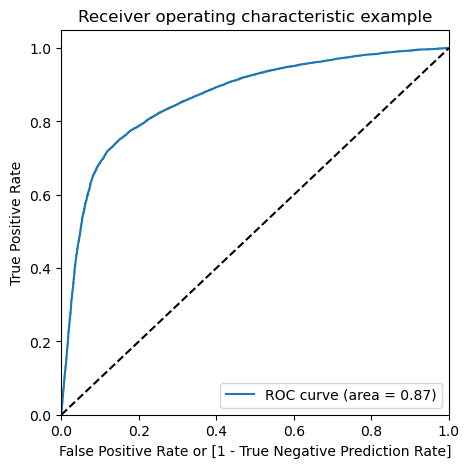

In [121]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

##### Finding Optimal Cutoff Point

In [122]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.014326,0,1,0,0,0,0,0,0,0,0,0
1,0,0.142769,0,1,1,0,0,0,0,0,0,0,0
2,1,0.858667,1,1,1,1,1,1,1,1,1,1,0
3,0,0.248204,0,1,1,1,0,0,0,0,0,0,0
4,0,0.000003,0,1,0,0,0,0,0,0,0,0,0


In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.620567     0.973826     0.267309
0.2          0.2  0.686148     0.946538     0.425758
0.3          0.3  0.729861     0.913590     0.546132
0.4          0.4  0.762761     0.867338     0.658184
0.5          0.5  0.788693     0.810973     0.766413
0.6          0.6  0.800111     0.742416     0.857806
0.7          0.7  0.783637     0.648024     0.919251
0.8          0.8  0.690188     0.417098     0.963278
0.9          0.9  0.557260     0.124873     0.989646


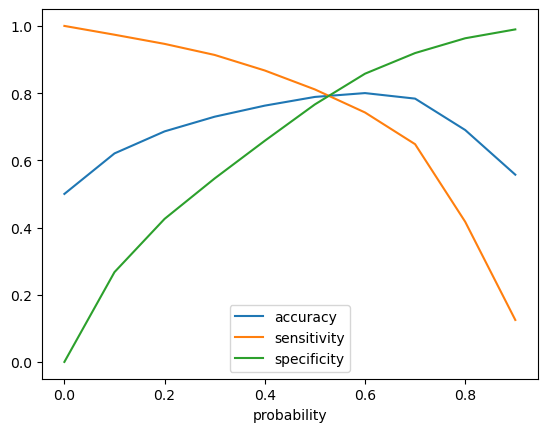

In [124]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

 - Initially we selected the optimm point of classification as 0.5.m
 - From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.

In [125]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.014326,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.142769,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.858667,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
3,0,0.248204,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.000003,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.788693     0.810973     0.766413
0.51         0.51  0.790870     0.805167     0.776574
0.52         0.52  0.791427     0.797233     0.785621
0.53         0.53  0.793289     0.791572     0.795007
0.54         0.54  0.794475     0.784750     0.804200
0.55         0.55  0.796991     0.779428     0.814553
0.56         0.56  0.798273     0.772848     0.823697
0.57         0.57  0.798442     0.765494     0.831390
0.58         0.58  0.798926     0.758043     0.839808
0.59         0.59  0.800208     0.750786     0.849630


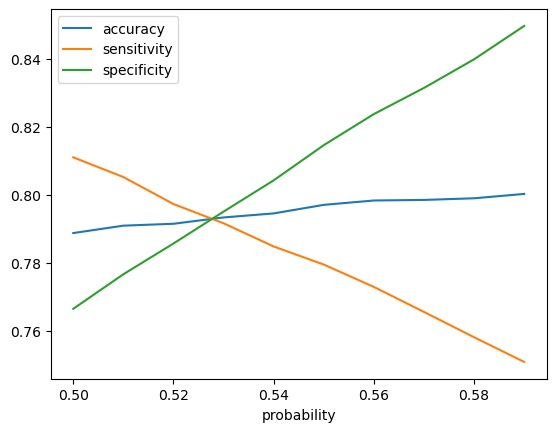

In [127]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

 - From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.53

In [128]:
#### From the curve above,we can take 0.53 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.014326,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.142769,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.858667,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0,0.248204,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.000003,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.793289467318206


In [130]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16432  4237]
 [ 4308 16361]]


In [131]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.7915719192994339
Specificity =  0.795007015336978
False Positive Rate =  0.2049929846630219
Precision =  0.7943004175162637
True Negative Prediction Rate =  0.7922854387656703


##### Precision and recall tradeoff

In [132]:
from sklearn.metrics import precision_recall_curve

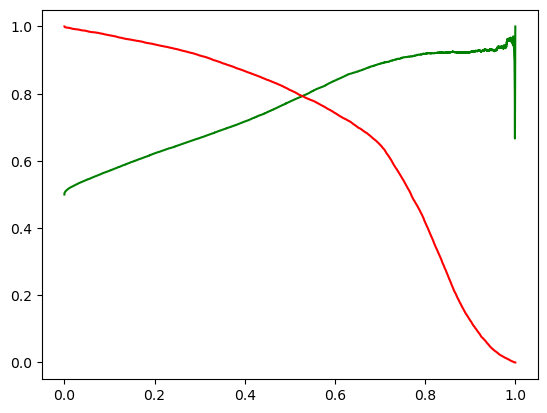

In [133]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Making predictions on the test set
- Transforming and feature selection for test data

In [134]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,isd_og_mou_8,og_others_6,og_others_7,...,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tenure,avg_arpu_6_7
16575,0.046455,0.000000,0.001074,0.000000,0.000000,0.011408,0.000000,0.0,0.000000,0.0,...,0.1875,1.0,1.0,1.0,0.160223,0.217613,0.412013,0.000000,0.094203,0.049051
10086,0.044771,0.075774,0.067489,0.068323,0.009290,0.007710,0.005207,0.0,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.268116,0.035274
18646,0.042529,0.136566,0.114743,0.149345,0.001090,0.002716,0.001079,0.0,0.000000,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000181,0.000000,0.565217,0.034930
10925,0.027401,0.000000,0.000000,0.000367,0.001958,0.000000,0.000843,0.0,0.000000,0.0,...,0.0000,1.0,1.0,0.0,0.000000,0.000000,0.092829,0.000000,0.036232,0.033257
24503,0.044181,0.000548,0.013906,0.014724,0.113417,0.107065,0.052672,0.0,0.087789,0.0,...,0.0000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.069046,0.224638,0.041169


In [135]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,arpu_8,onnet_mou_7,onnet_mou_8,offnet_mou_7,offnet_mou_8,std_ic_mou_8,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_8,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_8,aug_vbc_3g,sep_vbc_3g,avg_arpu_6_7
16575,0.046455,0.001074,0.000000,0.011408,0.000000,0.000000,0.0,0.022801,0.072464,0.015306,0.056642,0.006578,0.002816,0.0,0.0,0.0,0.1875,0.160223,0.000000,0.049051
10086,0.044771,0.067489,0.068323,0.007710,0.005207,0.004361,0.0,0.013029,0.014493,0.015306,0.089908,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.035274
18646,0.042529,0.114743,0.149345,0.002716,0.001079,0.000945,0.0,0.016287,0.036232,0.025510,0.112385,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.034930
10925,0.027401,0.000000,0.000367,0.000000,0.000843,0.000000,0.0,0.016287,0.028986,0.010204,0.000000,0.000170,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.033257
24503,0.044181,0.013906,0.014724,0.107065,0.052672,0.002617,0.0,0.052117,0.173913,0.091837,0.009890,0.000434,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.069046,0.041169


In [136]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

##### Predicting the target variable

In [137]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 16575    0.149841
10086    0.456164
18646    0.390711
10925    0.767817
24503    0.016403
10584    0.050278
2654     0.289205
23565    0.786948
5876     0.800044
19698    0.006442
dtype: float64


In [138]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
16575,0.149841
10086,0.456164
18646,0.390711
10925,0.767817
24503,0.016403


In [139]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [140]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
16575,0
10086,0
18646,0
10925,1
24503,0


In [141]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
16575,0,0.149841
10086,0,0.456164
18646,0,0.390711
10925,1,0.767817
24503,0,0.016403


In [142]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
16575,0,0.149841,0
10086,0,0.456164,0
18646,0,0.390711,0
10925,1,0.767817,1
24503,0,0.016403,0


In [143]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8030929209438742

In [144]:
# Metrics Evaluation - Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[5553 1338]
 [ 139  471]]


In [145]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7721311475409836
Specificity =  0.8058336961253809
False Positive Rate =  0.19416630387461906
Precision =  0.2603648424543947
True Negative Prediction Rate =  0.9755797610681658


##### Explaining the results

In [147]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n")

The accuracy of the predicted model is:  80.0 %
The sensitivity of the predicted model is:  77.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



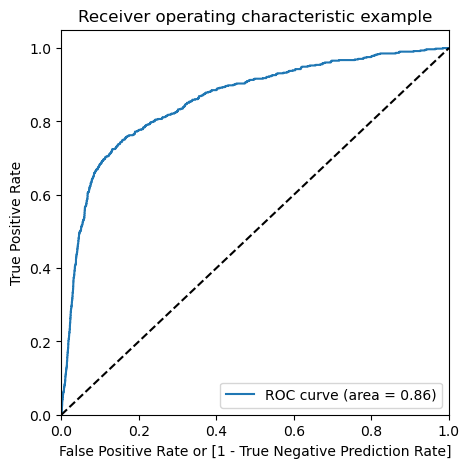

In [148]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

##### The AUC score for train dataset is 0.87 and the test dataset is 0.86. Hence the model is good model

## Step 8 - PCA

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [150]:
X_train.shape

(24000, 51)

In [151]:
from sklearn.decomposition import PCA

In [152]:
pca = PCA(random_state=42)

In [153]:
pca.fit(X_train)

PCA(random_state=42)

In [154]:
pca.components_

array([[ 3.93990295e-01,  2.36673290e-01,  2.81917362e-01, ...,
        -8.37380548e-04,  2.31884023e-04,  3.58813003e-01],
       [-1.73357639e-01,  4.06935420e-01,  4.51828292e-01, ...,
        -7.82148592e-03, -2.65834411e-03, -1.30046905e-01],
       [ 2.32178613e-01,  2.19991896e-01,  2.63152306e-01, ...,
         1.06928750e-02,  6.38740668e-04,  1.80485821e-01],
       ...,
       [ 1.32049308e-05, -2.76901073e-05, -2.11571971e-05, ...,
         1.45873411e-05, -1.22530444e-04,  4.96965721e-06],
       [-1.12320516e-05, -3.52250480e-06, -2.37600499e-06, ...,
        -2.79846087e-05,  2.57604709e-05,  7.73232824e-06],
       [-7.41153952e-07,  3.50516961e-06, -5.15572800e-06, ...,
        -1.86606043e-05, -3.76966497e-06,  6.87820991e-06]])

In [155]:
#Analysing the explained variance ratio
pca.explained_variance_ratio_

array([2.79681263e-01, 1.78117402e-01, 1.59194796e-01, 7.99754018e-02,
       6.47732361e-02, 4.20835444e-02, 2.61424907e-02, 2.48879514e-02,
       1.91190272e-02, 1.82736372e-02, 1.71773850e-02, 1.63607485e-02,
       1.31180484e-02, 1.16515004e-02, 1.11881038e-02, 1.04608239e-02,
       6.60774392e-03, 5.90732947e-03, 4.24660839e-03, 3.66244507e-03,
       2.22735535e-03, 1.61400729e-03, 9.95677706e-04, 7.59660561e-04,
       6.40736632e-04, 4.87738902e-04, 3.27342746e-04, 1.92878400e-04,
       4.35153081e-05, 2.75531951e-05, 2.09599748e-05, 8.70546066e-06,
       6.75888453e-06, 5.93736447e-06, 4.84019316e-06, 3.49994217e-06,
       1.29248702e-06, 7.81690130e-07, 5.20552301e-07, 2.70954297e-07,
       1.44461928e-07, 8.46128938e-08, 6.60544502e-08, 5.52513042e-08,
       4.09898443e-08, 3.56524372e-08, 1.86658292e-08, 1.66911851e-08,
       1.10623383e-08, 3.69245391e-09, 2.86933960e-09])

In [156]:
#Derive Cumulative sum of variance and plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)

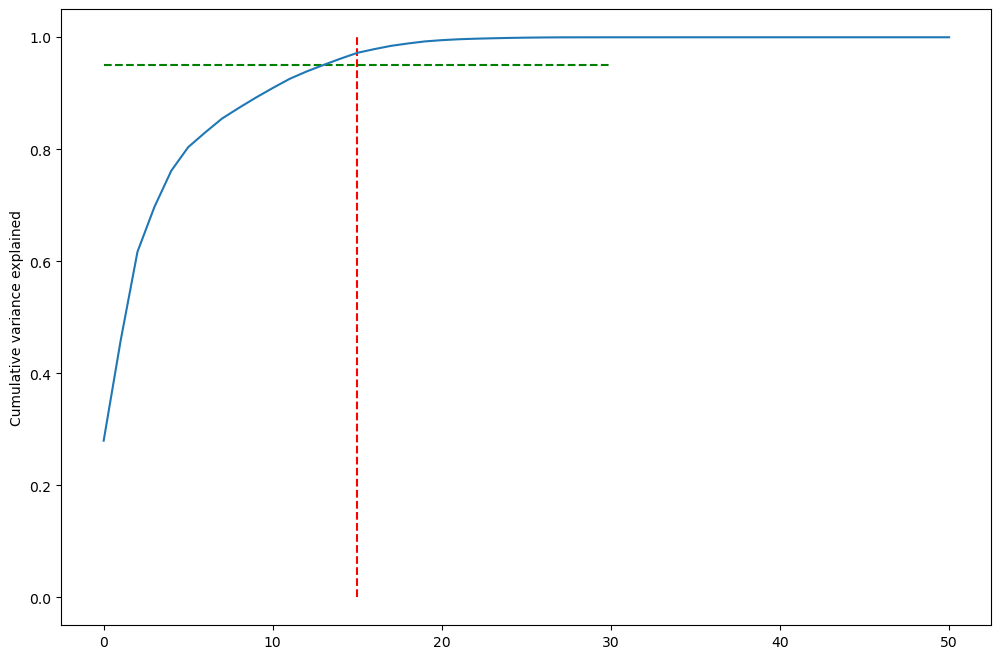

In [157]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [158]:
#we can use IncrementalPCA for the best result
from sklearn.decomposition import IncrementalPCA

In [159]:
pca_final = IncrementalPCA(n_components=16)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(24000, 16)

In [160]:
#correlation matrix
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(16, 16)

In [161]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6001, 16)

##### Applying logistic regression on the Principal components

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)

##### Making predictions on the test set

In [164]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [165]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.84'

##### Confusion matrix, Sensitivity and Specificity

In [166]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [167]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

[[5509   25]
 [ 416   51]]


In [168]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [169]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9265122479586736
Sensitivity:- 0.10920770877944326
Specificity:- 0.9954824719913263


#### Decision Tree with PCA

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [172]:
dt = DecisionTreeClassifier(random_state=42)

In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [175]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [176]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [177]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.142119,0.016180,0.002967,0.000960,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,34
1,0.132651,0.014855,0.002867,0.001526,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,34
2,0.138039,0.015853,0.001908,0.000636,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,34
3,0.139651,0.016620,0.002323,0.000688,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,34
4,0.127132,0.006337,0.001000,0.001000,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,34


In [178]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
42,0.276635,0.006987,0.002001,3.097148e-07,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.920833,0.9215,0.917667,0.919333,0.919833,0.001477,1
43,0.259865,0.011007,0.001393,1.483960e-03,5,100,150,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.920833,0.9215,0.917667,0.919333,0.919833,0.001477,1
44,0.247394,0.008802,0.003843,4.456138e-03,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.920833,0.9215,0.917667,0.919333,0.919833,0.001477,1
57,0.398111,0.014149,0.001111,1.527346e-03,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.920833,0.9215,0.917667,0.918000,0.919500,0.001687,4
58,0.391294,0.020150,0.002880,3.686513e-03,10,100,150,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.920833,0.9215,0.917667,0.918000,0.919500,0.001687,4


In [179]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50,
                       random_state=42)

In [180]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [181]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [182]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [183]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [184]:
evaluate_model(dt_best)

Train Accuracy : 0.932625
Train Confusion Matrix:
[[21729   297]
 [ 1320   654]]
--------------------------------------------------
Test Accuracy : 0.9173471088151974
Test Confusion Matrix:
[[5406  128]
 [ 368   99]]


#### Random Forest with PCA

In [185]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [187]:
rf.fit(df_train_pca, y_train)
rf.oob_score_

0.9176666666666666

In [188]:
from sklearn.metrics import roc_curve, auc

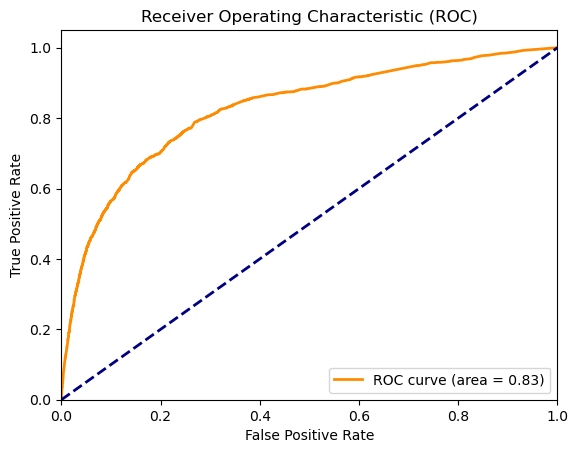

In [189]:
y_pred_prob = rf.predict_proba(df_train_pca)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [190]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [191]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [192]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [193]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [194]:
grid_search.best_score_

0.91775

In [195]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [196]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [197]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [198]:
evaluate_model(rfc_model)

Train Accuracy : 0.9178333333333333
Train Confusion Matrix:
[[22026     0]
 [ 1972     2]]
--------------------------------------------------
Test Accuracy : 0.9221796367272121
Test Confusion Matrix:
[[5534    0]
 [ 467    0]]


#### Note
 - The best parameters procuded the accuracy of 91% which is not significantly deterred than the accuracy of original random forest, which is pegged around 92%

#### Conclusion :
 - Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
 - The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
 - To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their  - services according to the needs of customers.

#### Details:
 - After cleaning the data, we broadly employed three models as mentioned below including some variations within these models in order to arrive at the best model in each of the cases.

### Logistic Regression  :

Logistic Regression with RFE Logistic regression with PCA Random Forest For each of these models, the summary of performance measures are as follows:

#### Logistic Regression

 - Train Accuracy : ~79%
 - Test Accuracy : ~80%

#### Logistic regression with PCA

 - Train Accuracy : ~91%
 - Test Accuracy : ~92%

#### Decision Tree with PCA:

 - Train Accuracy : ~93%
 - Test Accuracy : ~92%

#### Random Forest with PCA:
 - Train Accuracy : ~91%
 - Test Accuracy :~92%